In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResultsWrapper
from statsmodels.tsa.stattools import adfuller

In [39]:
df = pd.read_excel(r'D:\projects\SpendWise\data_internal\01-01-2024_31-12-2024.xls')

In [40]:
df['Date'] = pd.to_datetime(pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M:%S').dt.date)
df = df[['Date','Amount']]

In [41]:
df = df.groupby('Date').sum()

In [42]:
df

,Amount
Date,
2024-03-01,15
2024-03-02,200
2024-03-04,550
2024-03-06,103
2024-03-09,2043
...,...
2024-06-25,1008
2024-06-27,190
2024-06-28,135


<Figure size 1200x400 with 0 Axes>

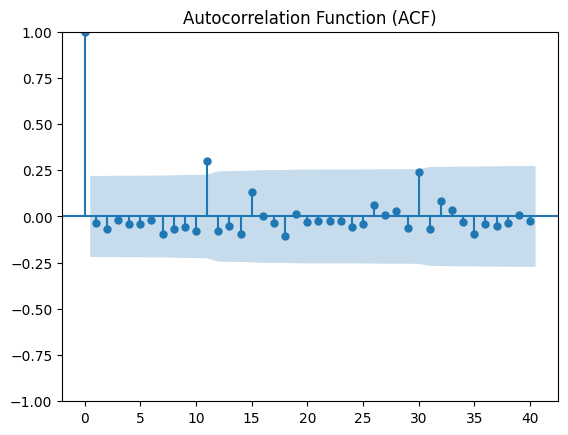

In [43]:
plt.figure(figsize=(12, 4))
plot_acf(df['Amount'], lags=40, title='Autocorrelation Function (ACF)')
plt.show()

#this graph shows that the lag of 15 days (relationship between today and past 15 days of data is high) is appropritate for modeling time series.

In [44]:
df['Amount']

Date
2024-03-01      15
2024-03-02     200
2024-03-04     550
2024-03-06     103
2024-03-09    2043
              ... 
2024-06-25    1008
2024-06-27     190
2024-06-28     135
2024-06-29     240
2024-07-01     800
Name: Amount, Length: 80, dtype: int64

In [60]:
model_fit = ARIMA(df['Amount'], order = (10, 0, 3)).fit()
round(model_fit.params,2)
type(model_fit)

c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

statsmodels.tsa.arima.model.ARIMAResultsWrapper

In [72]:
def ADFuller(train_data:pd.DataFrame) -> pd.Series:
    model_stationary:list = adfuller(train_data)
    print(model_stationary)
    return model_stationary[1]

In [78]:
def forecast_spend(train_data:pd.DataFrame,period:int) -> pd.Series:
    model_fit:ARIMAResultsWrapper = ARIMA(train_data, order = (10, 0, 0)).fit()
    forecast_result = model_fit.forecast(steps=period)
    return forecast_result

In [80]:
print(forecast_spend(train_data=df['Amount'],period=10))

c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


80    1039.394991
81     977.004049
82     823.446807
83     909.542468
84     864.550714
85     791.091681
86     817.395063
87     745.014483
88     676.928536
89     632.042603
Name: predicted_mean, dtype: float64


c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [81]:
df['adfuller'] = df['Amount'].rolling(10).apply(ADFuller)

(np.float64(-1.9832523139793097), np.float64(0.2939643080526035), 3, 6, {'1%': np.float64(-5.354256481481482), '5%': np.float64(-3.6462381481481483), '10%': np.float64(-2.901197777777778)}, np.float64(98.66752729103844))
(np.float64(-2.368851522239639), np.float64(0.15072148431968196), 3, 6, {'1%': np.float64(-5.354256481481482), '5%': np.float64(-3.6462381481481483), '10%': np.float64(-2.901197777777778)}, np.float64(91.65412146205564))
(np.float64(-1.7755611067033636), np.float64(0.3926606354494918), 3, 6, {'1%': np.float64(-5.354256481481482), '5%': np.float64(-3.6462381481481483), '10%': np.float64(-2.901197777777778)}, np.float64(92.42283096211624))
(np.float64(-1.845925400553154), np.float64(0.35791095483759616), 3, 6, {'1%': np.float64(-5.354256481481482), '5%': np.float64(-3.6462381481481483), '10%': np.float64(-2.901197777777778)}, np.float64(91.88261703304919))
(np.float64(-1.8331479242097108), np.float64(0.3641332319656386), 3, 6, {'1%': np.float64(-5.354256481481482), '5%':

In [82]:
df.head(20)

,Amount,adfuller
Date,,
2024-03-01,15,NaN
2024-03-02,200,NaN
2024-03-04,550,NaN
2024-03-06,103,NaN
2024-03-09,2043,NaN
2024-03-10,170,NaN
2024-03-13,60,NaN
2024-03-14,90,NaN
2024-03-15,495,NaN


In [88]:
data = [755, 1240, 65, 307, 242, 575, 55, 1563]
result = adfuller(data)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -2.10555044243025
p-value: 0.2422886059977568
Critical Values: {'1%': np.float64(-6.045114), '5%': np.float64(-3.9292800000000003), '10%': np.float64(-2.98681)}


<Axes: >

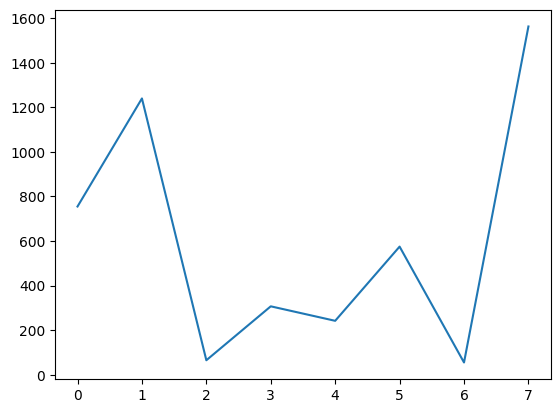

In [89]:
ser = pd.Series(data)
ser.plot(kind='line')